# Title of Project

Mileage Prediction - Regression Analysis

# Objective

The objective of mileage prediction using regression analysis is to establish a mathematical relationship between relevant variables (such as vehicle specifications, driving conditions, etc.) and fuel efficiency. By analyzing these variables, regression aims to create a predictive model that accurately estimates a vehicle's mileage, aiding in performance assessment, resource planning, and decision-making for individuals and businesses in the automotive sector.

# Data Source

YBI Foundation github Page

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/YBIFoundation/Dataset/main/MPG.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# Data Visualization

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


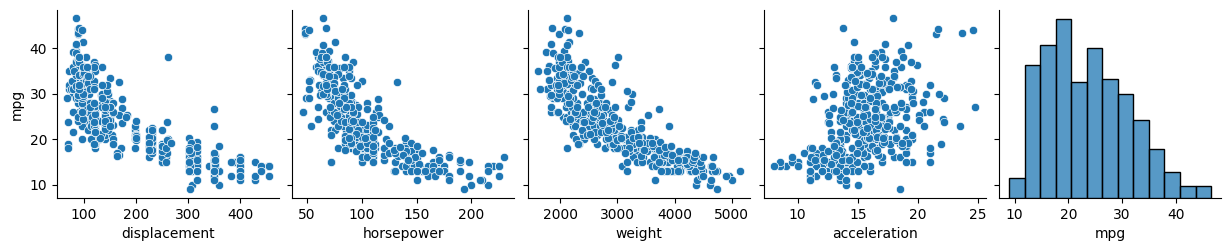

In [4]:
sns.pairplot(df, x_vars=['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars=['mpg'])

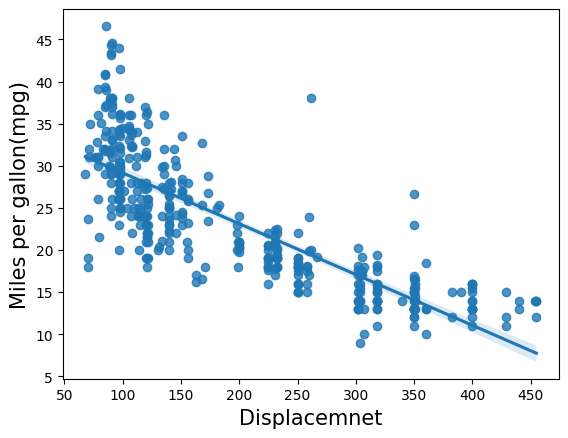

In [5]:
sns.regplot(x ='displacement' , y='mpg' , data=df)
plt.xlabel("Displacemnet", fontsize =15)
plt.ylabel("Miles per gallon(mpg)", fontsize =15)
plt.show()

# Data Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [8]:
df.corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_7820\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [9]:
df.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [10]:
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# Define Target Variable (y) and Feature Variables (X)

In [12]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [13]:
y = df['mpg']

In [14]:
y.shape

(392,)

In [15]:
x = df[['displacement' ,'horsepower', 'weight' , 'acceleration']]

In [16]:
x.shape

(392, 4)

In [17]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


# Scaling Data

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
ss = StandardScaler()

In [20]:
x = ss.fit_transform(x)

In [21]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [22]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


# Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train , x_test, y_train, y_test = train_test_split(x, y, train_size =0.7 , random_state=2529) 

In [25]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((274, 4), (118, 4), (274,), (118,))

# Modeling

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(x_train , y_train)

LinearRegression()

In [29]:
lr.intercept_

23.485738559737584

In [30]:
lr.coef_

array([-1.05767743, -1.68734727, -4.10787617, -0.11495177])

# Prediction

In [31]:
y_pred = lr.predict(x_test)

In [32]:
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

# Model Accuracy

In [33]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error , r2_score

In [34]:
mean_absolute_error(y_test, y_pred)

3.3286968643244106

In [35]:
mean_absolute_percentage_error(y_test, y_pred)

0.14713035779536746

# Explaination

In [ ]:
A Mileage Prediction Machine Learning (ML) project involves developing a model that can accurately predict the fuel efficiency or mileage of a vehicle based on certain input features. Here's an explanation of the key steps and components involved in such a project:

Data Collection and Preprocessing:
Gather a dataset that contains information about various vehicles, including their specifications and associated mileage. The dataset should include features like engine size, weight, horsepower, and other relevant factors that could impact fuel efficiency. Clean and preprocess the data to handle missing values, outliers, and categorical variables.

Feature Selection/Engineering:
Identify the most relevant features that could contribute to predicting mileage accurately. You might need to transform or engineer features to make them more suitable for modeling. For example, you could create new features like "engine efficiency" by combining existing features.

Data Splitting:
Split the dataset into training and testing subsets. The training subset will be used to train the model, while the testing subset will be used to evaluate its performance on unseen data.

Model Selection:
Choose an appropriate regression algorithm for your mileage prediction task. Linear Regression is a common choice for such problems, but you can also explore other algorithms like Random Forest Regression, Gradient Boosting, or Neural Networks.

Model Training:
Train the selected model using the training data. During training, the model learns the relationships between the input features and the target (mileage) by adjusting its internal parameters.

Model Evaluation:
Use the testing data to evaluate the model's performance. Common evaluation metrics for regression tasks include Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R2) score. These metrics help you understand how well the model's predictions match the actual mileage values.

Hyperparameter Tuning (Optional):
If applicable, tune the hyperparameters of the chosen algorithm to optimize the model's performance. Hyperparameters control aspects of the algorithm's behavior, such as regularization strength in Linear Regression or the number of trees in a Random Forest.

Prediction and Deployment (Optional):
Once you're satisfied with the model's performance, you can deploy it for making real-world predictions. Users could input vehicle specifications, and the model would provide an estimated mileage.

Iterative Refinement:
If your model's performance is not satisfactory, you can revisit earlier steps to improve it. This might involve collecting more data, experimenting with different features, trying different algorithms, or fine-tuning hyperparameters.

Communication:
Finally, communicate your results and findings. This could involve creating visualizations to show how well the model's predictions align with the actual mileage. Explain the model's strengths, weaknesses, and potential applications.

Overall, a Mileage Prediction ML project demonstrates how machine learning can be applied to real-world problems in the automotive domain, providing insights into the factors that affect vehicle fuel efficiency and offering a useful tool for vehicle buyers, manufacturers, and enthusiasts.